In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
df["flight_day"] = df["flight_day"].map({
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'booking_complete')

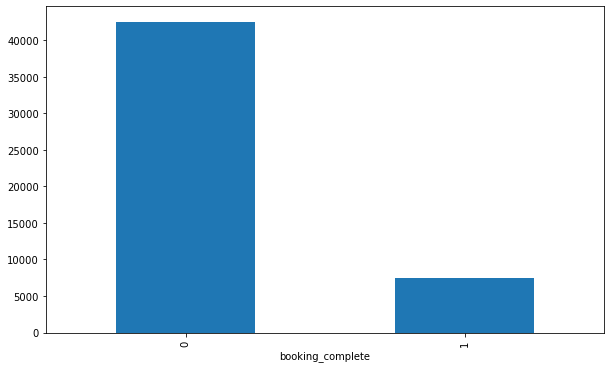

In [9]:
df['booking_complete'].value_counts().plot(kind='bar',figsize=(10,6))
plt.xlabel('booking_complete')

This dataset is severly imbalanced.

<AxesSubplot:xlabel='wants_preferred_seat', ylabel='count'>

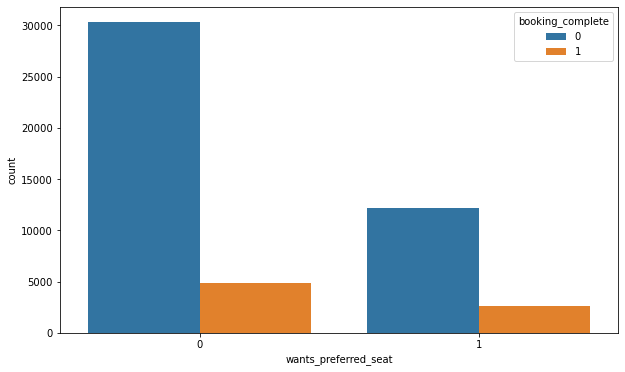

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='wants_preferred_seat',data=df,hue='booking_complete')

<AxesSubplot:xlabel='wants_in_flight_meals', ylabel='count'>

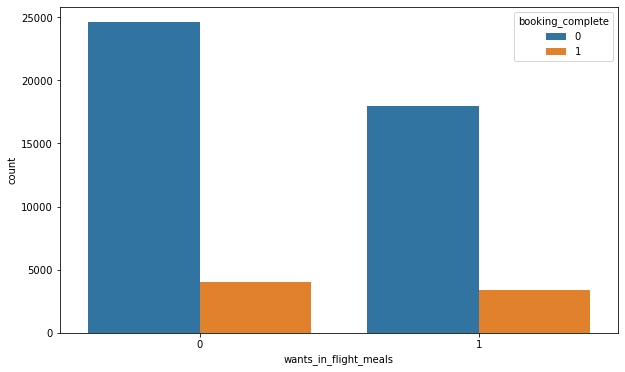

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='wants_in_flight_meals',data=df,hue='booking_complete')

<AxesSubplot:xlabel='wants_extra_baggage', ylabel='count'>

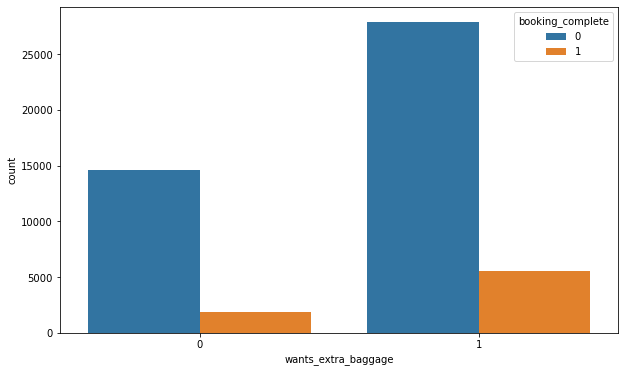

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='wants_extra_baggage',data=df,hue='booking_complete')

In [13]:
df.corr()['booking_complete'].sort_values()

flight_duration         -0.106266
length_of_stay          -0.042408
purchase_lead           -0.022131
flight_day              -0.006986
flight_hour              0.007127
num_passengers           0.024116
wants_in_flight_meals    0.026511
wants_preferred_seat     0.050116
wants_extra_baggage      0.068139
booking_complete         1.000000
Name: booking_complete, dtype: float64

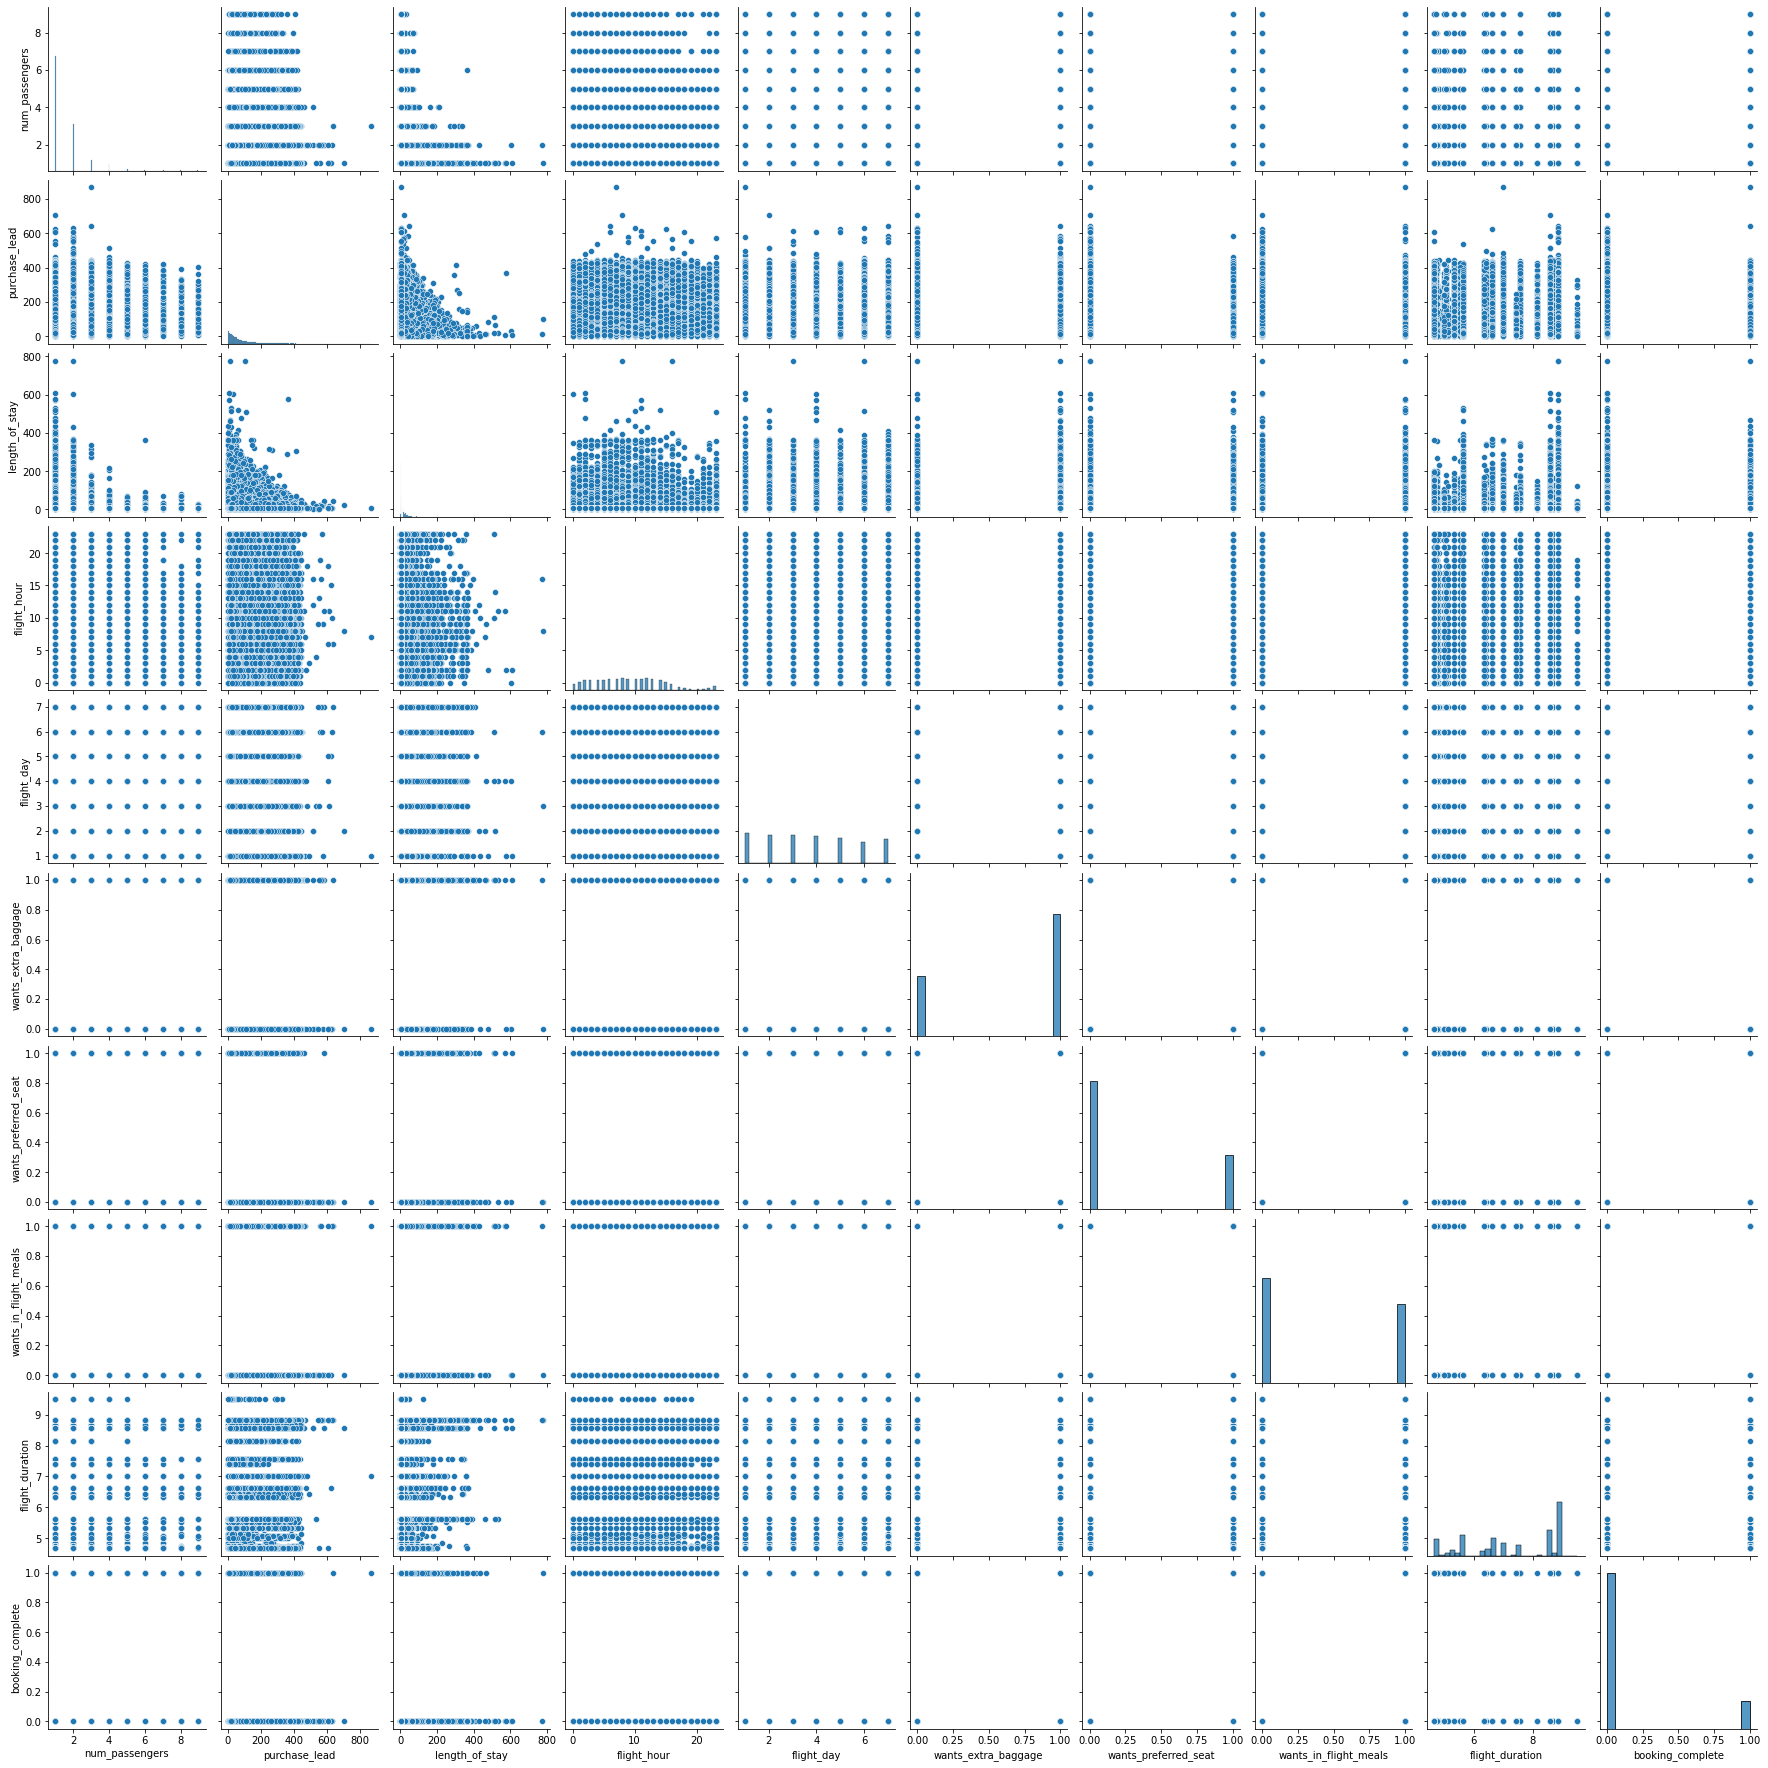

In [14]:
sns.pairplot(df)

In [15]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


<AxesSubplot:xlabel='sales_channel', ylabel='count'>

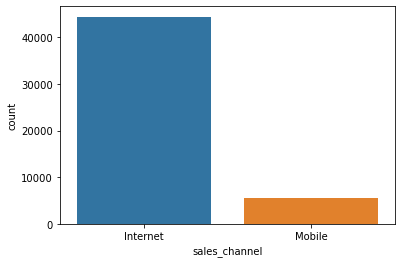

In [16]:
sns.countplot(x='sales_channel',data=df)

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

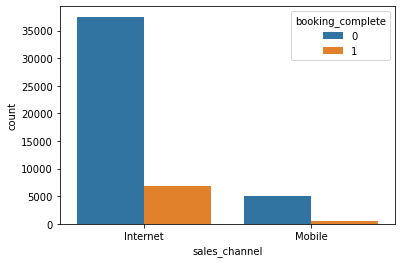

In [17]:
sns.countplot(x='sales_channel',data=df,hue='booking_complete')

<AxesSubplot:xlabel='trip_type', ylabel='count'>

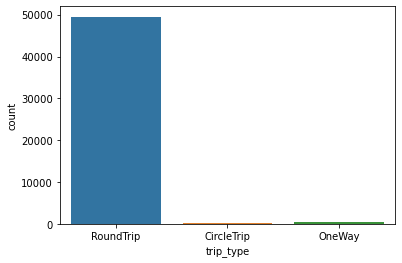

In [18]:
sns.countplot(x='trip_type',data=df)

<AxesSubplot:xlabel='trip_type', ylabel='count'>

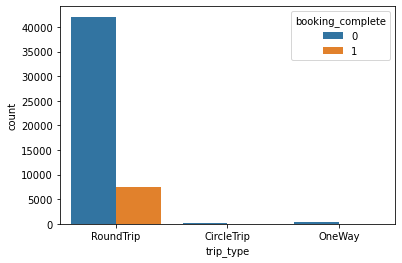

In [19]:
sns.countplot(x='trip_type',data=df,hue='booking_complete')

In [20]:
df.booking_origin.nunique()

104

In [21]:
df.route.nunique()

799

<AxesSubplot:>

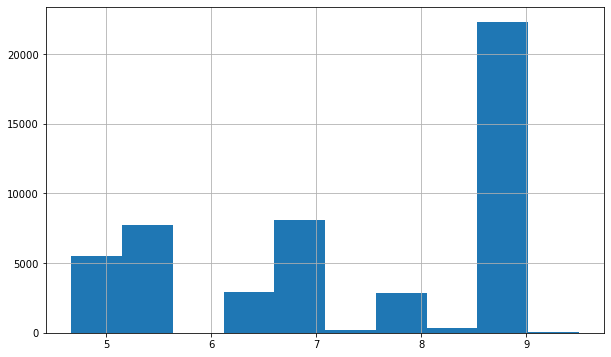

In [22]:
df.flight_duration.hist(bins=10,figsize=(10,6))

<AxesSubplot:>

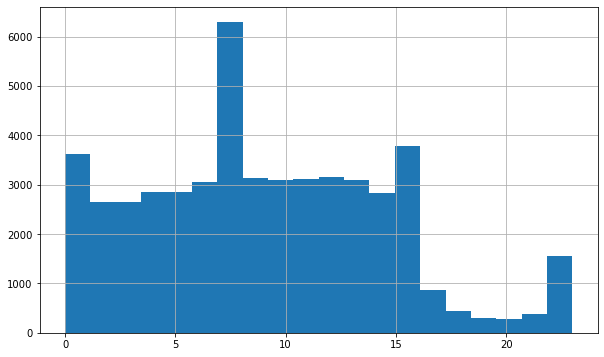

In [23]:
df.flight_hour.hist(bins=20,figsize=(10,6))

<AxesSubplot:xlabel='flight_day', ylabel='count'>

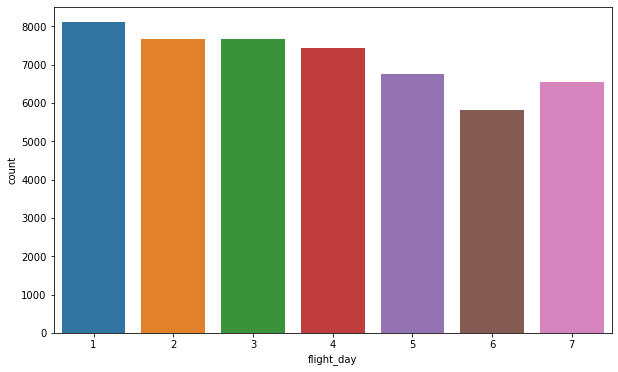

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='flight_day',data=df)

<AxesSubplot:xlabel='flight_day', ylabel='count'>

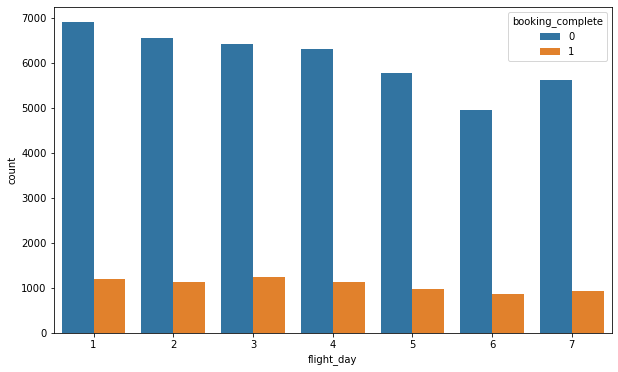

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='flight_day',data=df,hue='booking_complete')

# Encoding Categorical variables

In [26]:
df = pd.get_dummies(df,columns=['sales_channel','trip_type'],drop_first=True)

In [27]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1


In [28]:
df = df.drop(columns=['route','booking_origin'])

In [29]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,0,0,1


In [30]:
X = df.drop(columns='booking_complete')
y = df['booking_complete']

# Modelling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
predicitions = model.predict(X_test)

# Evaluation

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
print(confusion_matrix(y_test,predicitions))
print('\n')
print(classification_report(y_test,predicitions))

[[12784     0]
 [ 2216     0]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12784
           1       0.00      0.00      0.00      2216

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000



C:\Users\katya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\katya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
model.coef_

array([[ 0.02414158, -0.04384369, -0.19418321,  0.03265158, -0.00833871,
         0.18847272,  0.12418124,  0.0595322 , -0.29894851, -0.15638221,
         0.01503759,  0.11732122]])

In [71]:
def get_feature_importance(model,feature_names):
    feature_importance = (
    pd.DataFrame(
    {
        
        'variable': feature_names,
        'coefficient': model.coef_[0]
    }
    )
    .round(decimals=2)
    .sort_values('coefficient',ascending=True)
    #.style.bar(color=['red','green'],align='zero')
    )
    return feature_importance

In [72]:
df_importance = get_feature_importance(model,X.columns)

In [73]:
df_importance

,variable,coefficient
8,flight_duration,-0.30
2,length_of_stay,-0.19
9,sales_channel_Mobile,-0.16
1,purchase_lead,-0.04
4,flight_day,-0.01
0,num_passengers,0.02
10,trip_type_OneWay,0.02
3,flight_hour,0.03
7,wants_in_flight_meals,0.06
6,wants_preferred_seat,0.12


In [74]:
df_imp_plot = df_importance.reset_index()

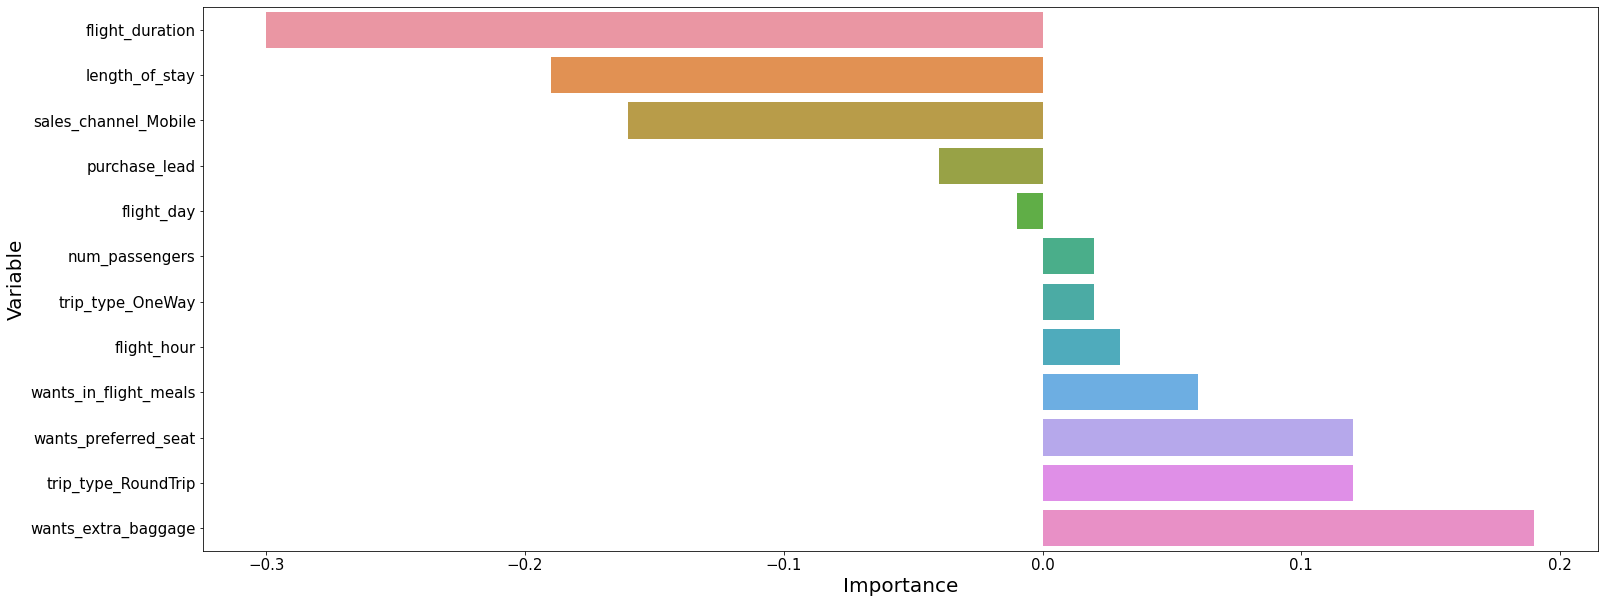

In [90]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data=df_imp_plot.iloc[:12,:],x='coefficient',y='variable',orient='h')
ax.set_xlabel("Importance",fontsize=20)
ax.set_ylabel("Variable",fontsize=20)
ax.tick_params(labelsize=15)